In [219]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import fftpack
%pylab inline
plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (22, 6)
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['correlate', 'fftpack', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [220]:
df1 = pd.read_csv('Data/BMS/Rooms and HVAC/RCU middenhal.csv', delimiter=';', encoding='utf-8')
df2 = pd.read_csv('Data/tickets-8min.csv', delimiter=',', encoding='utf-8')

In [221]:
df_ticketing = pd.DataFrame()

In [222]:
df_ticketing['time'] = pd.to_datetime(df2['period ending'], format="%Y-%m-%d %H:%M:%S")
df_ticketing['visitors'] = df2['visitors']

In [223]:
df_ticketing.sort_values(['time'], inplace=True)

In [224]:
def shift(row, mean):

    return (row - mean)

In [225]:
def multi_resolution_ticketing(df, column1, freq):

    grouped =  df.groupby(pd.Grouper(key='time', freq=freq))
    norm_df = pd.DataFrame()
    
    mean_ticketing_list = []
    
    for name, group in grouped:
        df_sub = pd.DataFrame(group)
        
        mean_tick = df_sub[column1].mean()
        mean_ticketing_list.append(mean_tick)
        df_sub['Ticketing_piecewise'] = mean_tick
        
        df_sub['Ticketing_shifted'] = df_sub.apply(lambda row: shift(row[column1], mean_tick), axis=1)
        
        norm_df = norm_df.append(df_sub)
    
    return norm_df, mean_ticketing_list


In [226]:
df_ticketing['visitors_rm'] = pd.rolling_mean(df_ticketing['visitors'], 180)

C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=180,center=False).mean()
  """Entry point for launching an IPython kernel.


In [227]:
df_ticketing['visitors_rm'].fillna(0, inplace=True)

In [228]:
df_ticketing, mean_ticketing_week = multi_resolution_ticketing(df_ticketing, 'visitors_rm', 'W')

In [230]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week']

In [231]:
df_ticketing, mean_ticketing_day = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_week', 'D')

In [233]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day']

In [234]:
df_ticketing, mean_ticketing_2H = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_day', '2H')

In [235]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day', 'Ticketing_piecewise_2H', 'Ticketing_shifted_2H' ]

In [236]:
df_ticketing, mean_ticketing_32Min = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_2H', '32Min')

In [237]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day', 'Ticketing_piecewise_2H', 'Ticketing_shifted_2H',
                       'Ticketing_piecewise_32Min', 'Ticketing_shifted_32Min']

In [238]:
df_ticketing, mean_ticketing_16Min = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_32Min', '16Min')

In [239]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day', 'Ticketing_piecewise_2H', 'Ticketing_shifted_2H',
                       'Ticketing_piecewise_32Min', 'Ticketing_shifted_32Min', \
                        'Ticketing_piecewise_16Min', 'Ticketing_shifted_16Min']

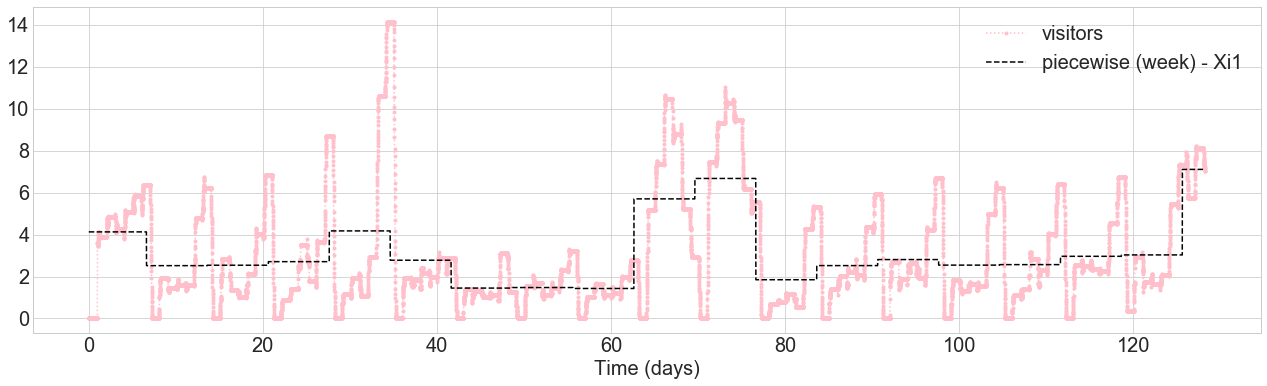

In [265]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['visitors_rm'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_week'], linestyle='--', color="black", label = "piecewise (week) - X1")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

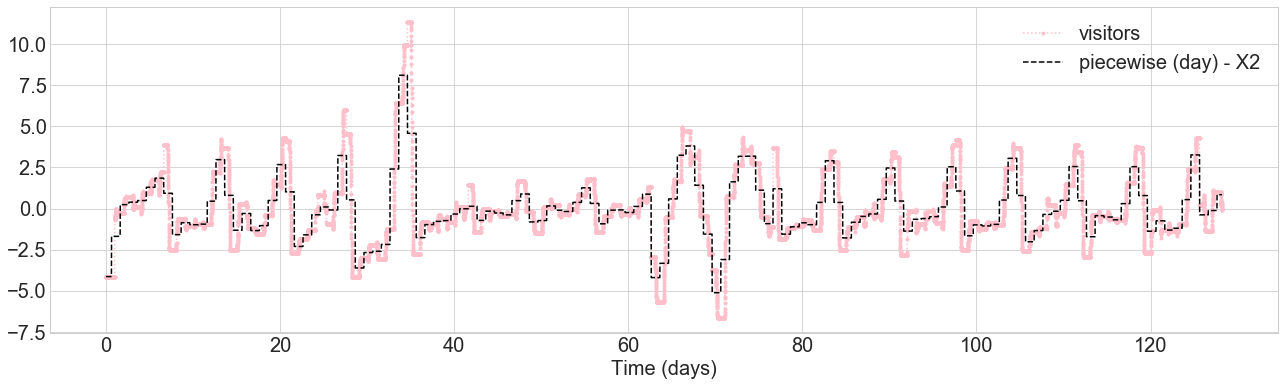

In [267]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_week'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_day'], linestyle='--', color="black", label = "piecewise (day) - X2")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

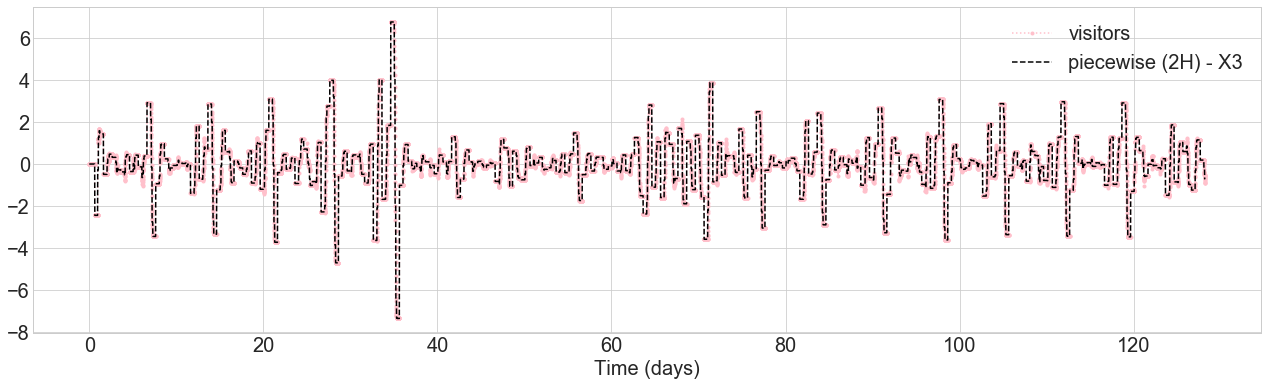

In [268]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_day'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_2H'], linestyle='--', color="black", label = "piecewise (2H) - X3")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

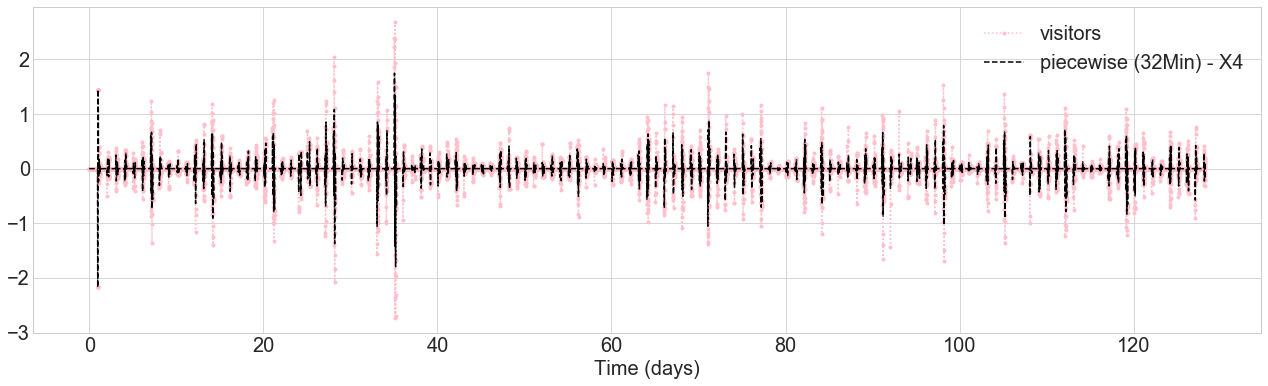

In [269]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_2H'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_32Min'], linestyle='--', color="black", label = "piecewise (32Min) - X4")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

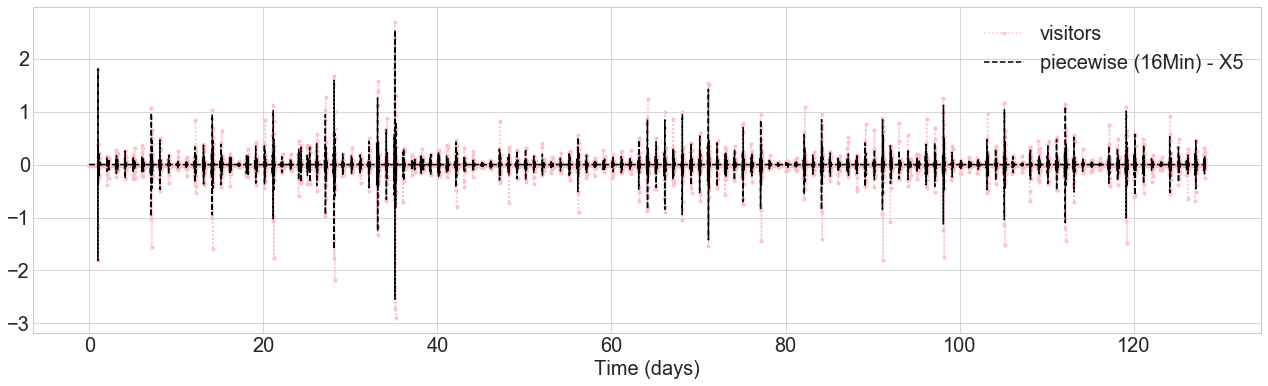

In [270]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_32Min'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_16Min'], linestyle='--', color="black", label = "piecewise (16Min) - X5")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

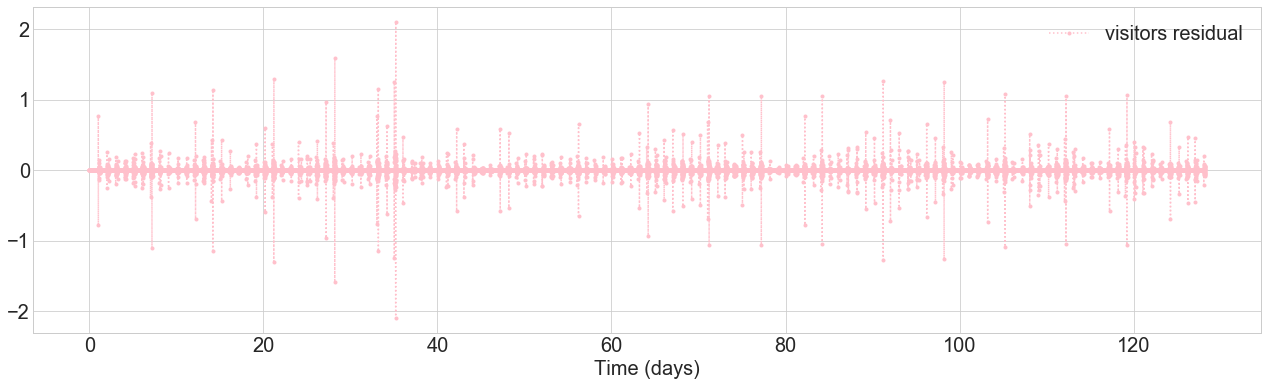

In [273]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_16Min'], linestyle=':', marker='.', color="pink", label="visitors residual")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

In [240]:
df_data = df1[['Tijdstip', 'Gemiddelde ruimtetemp [°C] - RCU Middelhal 255 ()', 'Luchtkwaliteitopnemer [ppm] - RCU Middelhal 255 (255QT01)']]
df_data.is_copy = False
df_data.columns = ['Time', 'Temperature', 'CO2']

In [241]:
df_data.is_copy = False
df_data['Time'] = pd.to_datetime(df_data['Time'], format="%d-%m-%Y %H:%M.%S")

df_data['Temperature'] = [str(x).replace(',', '.') for x in df_data['Temperature']]
df_data['Temperature'] = pd.to_numeric(df_data['Temperature'], errors='coerce')
df_data['CO2'] = pd.to_numeric(df_data['CO2'], errors='coerce')

In [242]:
df_data.sort_values(['Time'], inplace=True)

In [243]:
df_data = df_data.loc[df_data['Time'] > datetime.datetime(2017, 10, 23, 9, 0, 0)]
df_data = df_data.loc[df_data['Time'] <= datetime.datetime(2018, 2, 28, 13, 56, 0)]

In [244]:
mean1 = df_data['Temperature'].mean()
df_data['Temperature_centered'] = [i-mean1 for i in df_data['Temperature']]

mean2 = df_data['CO2'].mean()
df_data['CO2_centered'] = [i-mean2 for i in df_data['CO2']]

In [245]:


def multi_resolution(df, column1, column2, freq):

    grouped =  df.groupby(pd.Grouper(key='Time', freq=freq))
    norm_df = pd.DataFrame()
    
    mean_temp_list = []
    mean_CO2_list = []
    
    mean_temp_list_actual = []
    mean_CO2_list_actual = []
    
    for name, group in grouped:
        df_sub = pd.DataFrame(group)
        
        mean_temp = df_sub[column1].mean()
        mean_temp_actual = df_sub['Temperature'].mean()
        mean_temp_list.append(mean_temp)
        mean_temp_list_actual.append(mean_temp_actual)
        df_sub['Temperature_piecewise'] = mean_temp
        
        mean_CO2 = df_sub[column2].mean()
        mean_CO2_actual = df_sub['CO2'].mean()
        mean_CO2_list.append(mean_CO2)
        mean_CO2_list_actual.append(mean_CO2_actual)
        df_sub['CO2_piecewise'] = mean_CO2
        
        df_sub['Temperature_shifted'] = df_sub.apply(lambda row: shift(row[column1], mean_temp), axis=1)
        df_sub['CO2_shifted'] = df_sub.apply(lambda row: shift(row[column2], mean_CO2), axis=1)
        
        norm_df = norm_df.append(df_sub)
    
    return norm_df, list(mean_temp_list), list(mean_CO2_list), list(mean_temp_list_actual), list(mean_CO2_list_actual)

In [246]:
df_data, mean_temp_week, mean_CO2_week, mean_temp_week_actual, mean_CO2_week_actual = multi_resolution(df_data, 'Temperature', \
                                                        'CO2', 'W')

In [247]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week']

In [248]:
df_data, mean_temp_day, mean_CO2_day, mean_temp_day_actual, mean_CO2_day_actual = multi_resolution(df_data, 'Temperature_shifted_week', \
                                                      'CO2_shifted_week', 'D')

In [250]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2__centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day']

In [251]:
df_data, mean_temp_2H, mean_CO2_2H, mean_temp_2H_actual, mean_CO2_2H_actual = multi_resolution(df_data, 'Temperature_shifted_day', \
                                                      'CO2_shifted_day', '2H')

In [252]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H']

In [253]:
df_data, mean_temp_32Min, mean_CO2_32Min, mean_temp_32Min_actual, mean_CO2_32Min_actual = multi_resolution(df_data, 'Temperature_shifted_2H', \
                                                      'CO2_shifted_2H', '32Min')

In [254]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H', \
                  'Temperature_piecewise_32Min', 'CO2_piecewise_32Min', 'Temperature_shifted_32Min', 'CO2_shifted_32Min']

In [255]:
df_data, mean_temp_16Min, mean_CO2_16Min, mean_temp_16Min_actual, mean_CO2_16Min_actual = multi_resolution(df_data, 'Temperature_shifted_32Min', \
                                                      'CO2_shifted_32Min', '16Min')

In [256]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H', \
                  'Temperature_piecewise_32Min', 'CO2_piecewise_32Min', 'Temperature_shifted_32Min', 'CO2_shifted_32Min', \
                  'Temperature_piecewise_16Min', 'CO2_piecewise_16Min', 'Temperature_shifted_16Min', 'CO2_shifted_16Min']

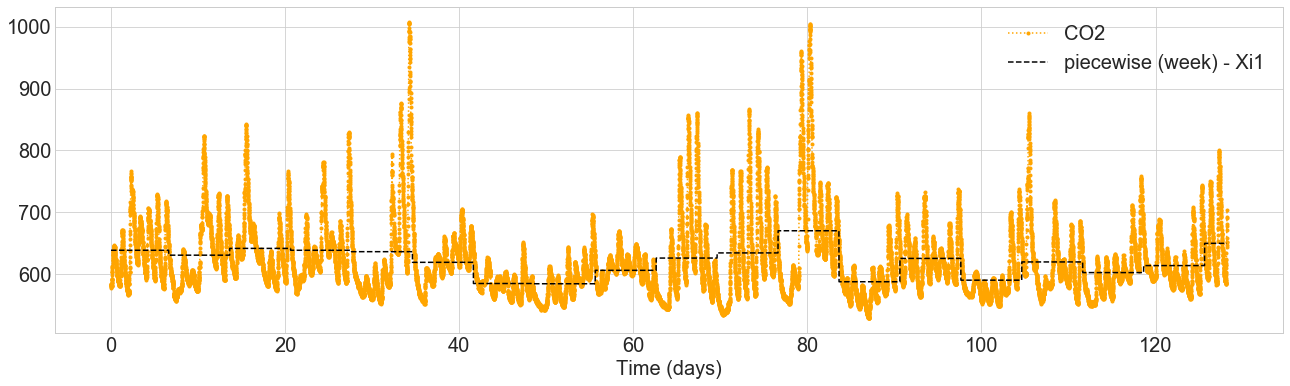

In [257]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2'], linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(x_range, df_data['CO2_piecewise_week'], linestyle='--', color="black", label = "piecewise (week) - Xi1")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

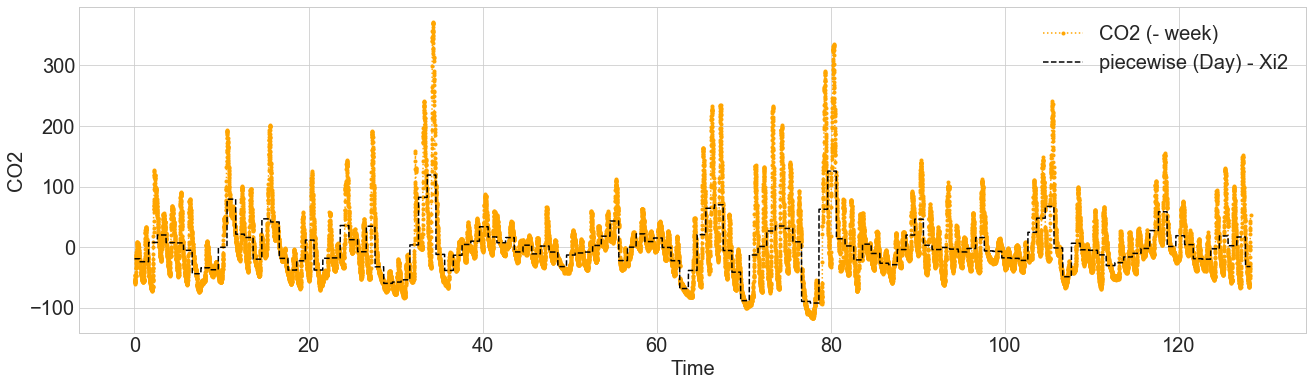

In [258]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_week'], linestyle=':', marker='.', color="orange", label="CO2 (- week)")
plt.plot(x_range, df_data['CO2_piecewise_day'], linestyle='--', color="black", label = "piecewise (Day) - Xi2")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

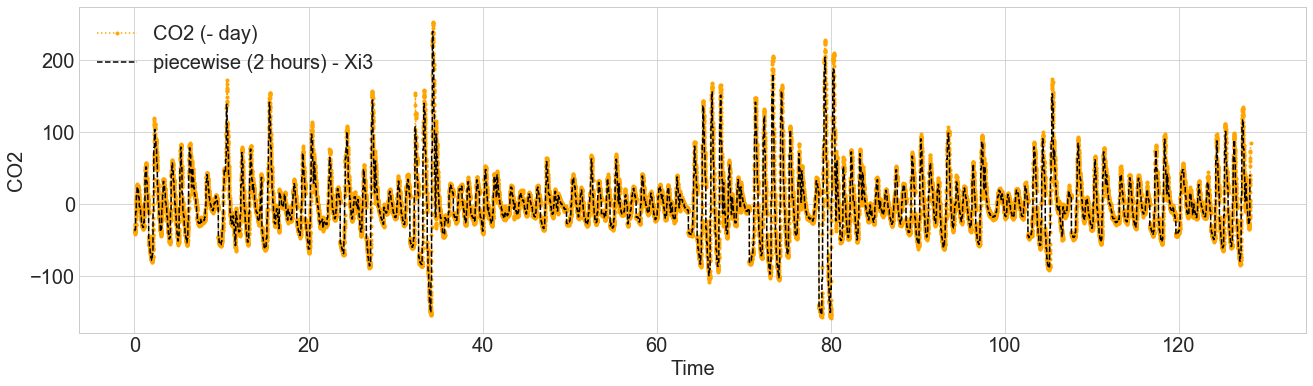

In [259]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_day'], linestyle=':', marker='.', color="orange", label="CO2 (- day)")
plt.plot(x_range, df_data['CO2_piecewise_2H'], linestyle='--', color="black", label = "piecewise (2 hours) - Xi3")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

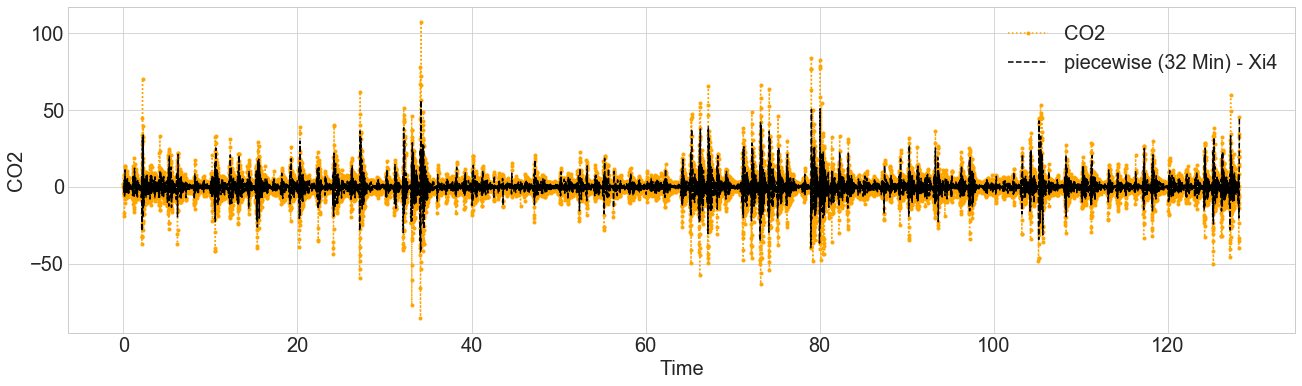

In [260]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_2H'], linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(x_range, df_data['CO2_piecewise_32Min'], linestyle='--', color="black", label = "piecewise (32 Min) - Xi4")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

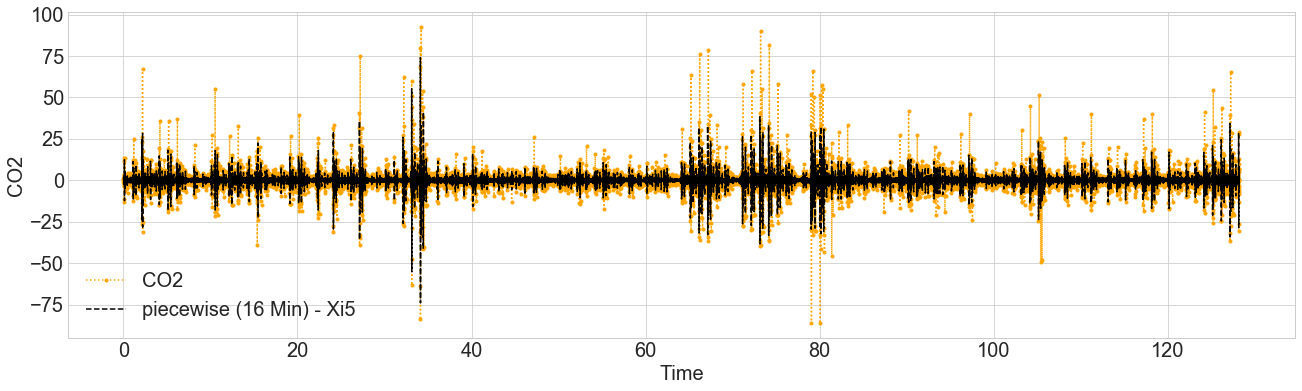

In [262]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_32Min'], linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(x_range, df_data['CO2_piecewise_16Min'], linestyle='--', color="black", label = "piecewise (16 Min) - Xi5")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

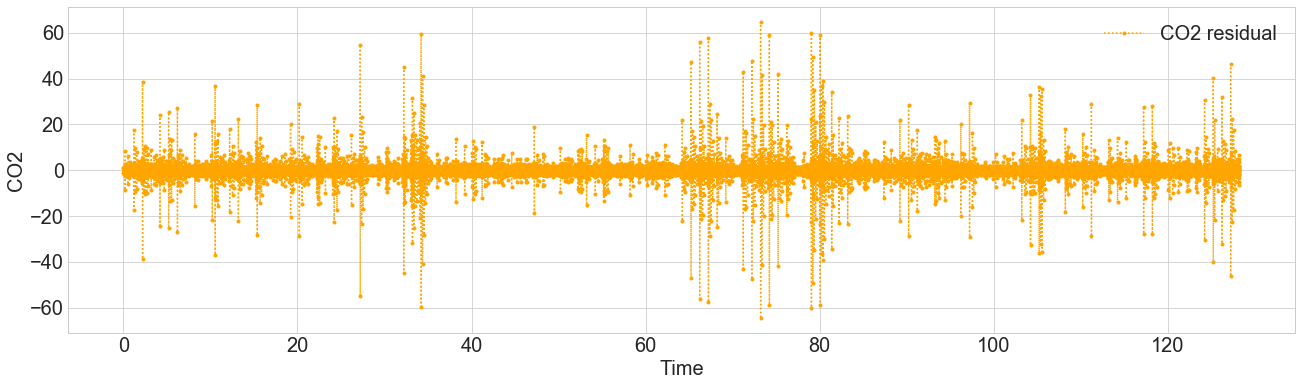

In [272]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_16Min'], linestyle=':', marker='.', color="orange", label="CO2 residual")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

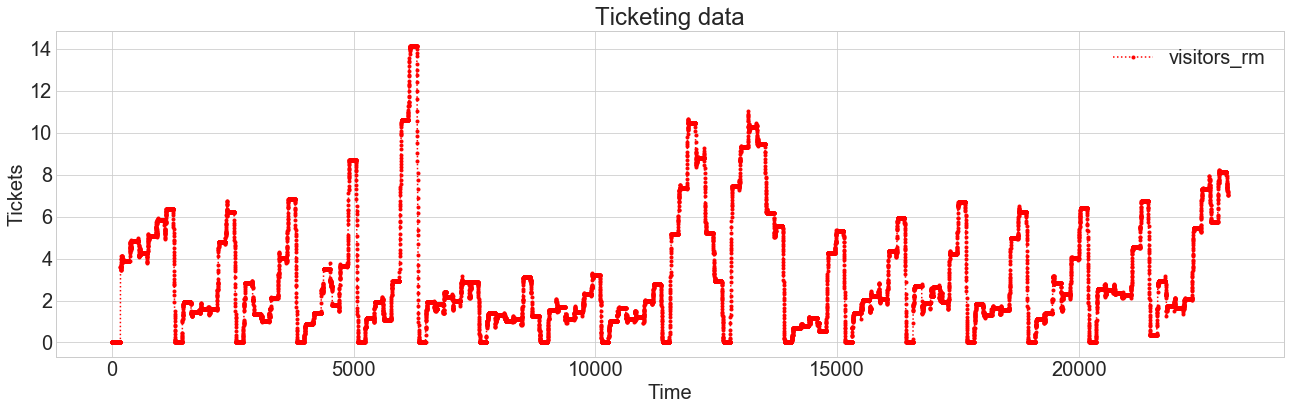

In [186]:
# plt.plot(residual, linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(range(len(df_ticketing['visitors_rm'])), df_ticketing['visitors_rm'], linestyle=':', marker='.', color="red")
# plt.plot(x_range, df_data['CO2_piecewise_8Min'], linestyle='--', color="black", label = "piecewise (8 Min)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Tickets')
plt.title('Ticketing data')
plt.show()

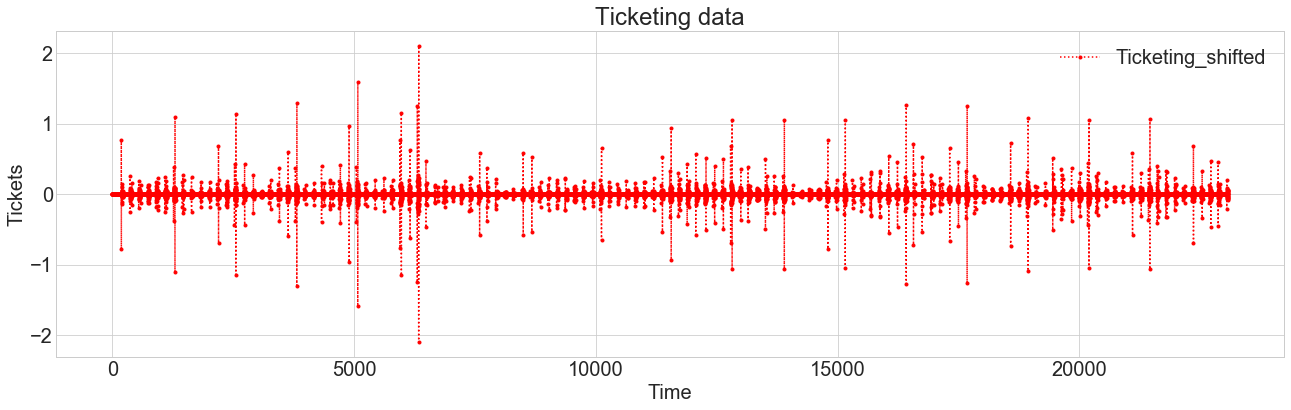

In [190]:
# plt.plot(residual, linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(range(len(df_ticketing['Ticketing_shifted'])), df_ticketing['Ticketing_shifted'], linestyle=':', marker='.', color="red")
# plt.plot(x_range, df_data['CO2_piecewise_8Min'], linestyle='--', color="black", label = "piecewise (8 Min)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Tickets')
plt.title('Ticketing data')
plt.show()

In [215]:
from scipy.signal import correlate

lag = np.argmax(correlate(df_ticketing['Ticketing_shifted'], df_data['CO2_shifted_16Min']))
c_sig = np.roll(df_data['CO2_shifted_16Min'], shift=int(np.ceil(lag)))

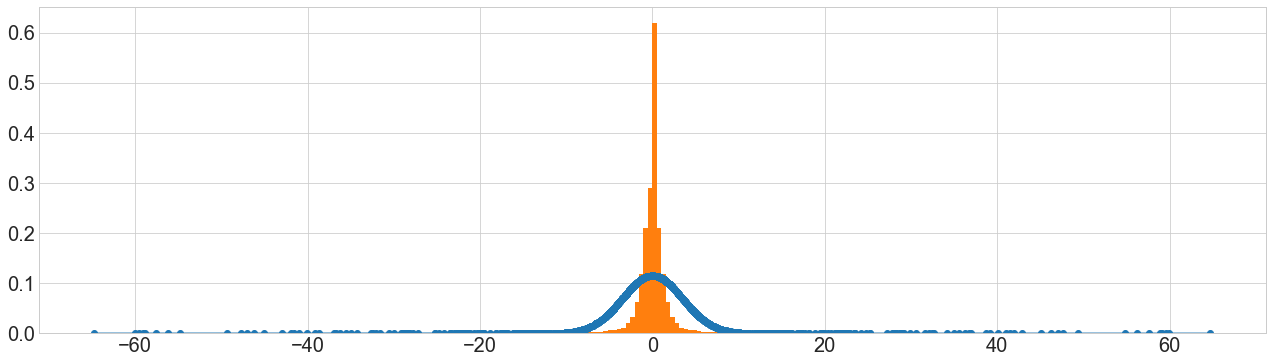

In [49]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import statsmodels.api as sm

h = sorted(list(df_data['CO2_shifted_16Min']))  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h, bins=250, normed=True)      #use this to draw histogram of your data
# pl.xlim([-20, 20])
pl.show()          

In [20]:
def autocorr(x):
    result = numpy.correlate(x, x, mode='full')
    return result[int(result.size/2):]

In [46]:
mean1 = np.mean(mean_CO2_day_actual)
mean_CO2_day_actual_centered =  [i-mean1 for i in mean_CO2_day_actual]

mean2 = np.mean(mean_CO2_2H_actual)
mean_CO2_2H_actual_centered =  [i-mean2 for i in mean_CO2_2H_actual]

Text(0.5,1,'Autocorrelaion of $\\xi_5$ (16Min)')

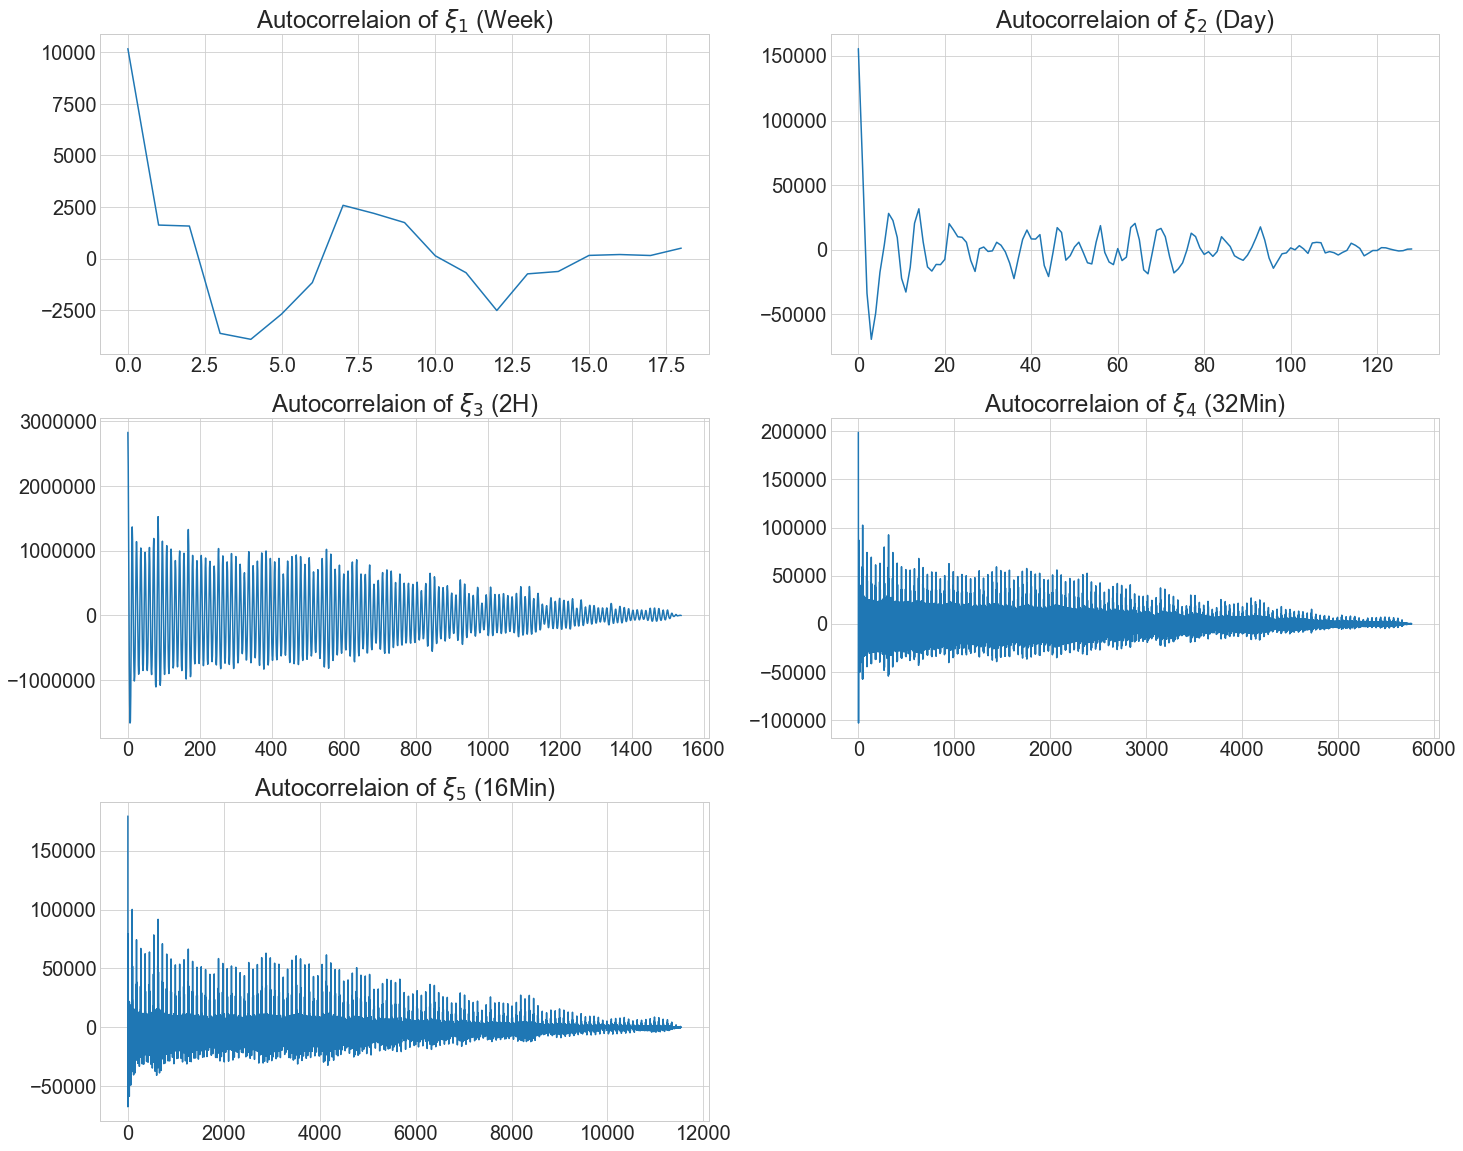

In [90]:
pylab.rcParams['figure.figsize'] = (24, 20)

plt.subplot(3,2,1)
mean_CO2_week_centered = mean_CO2_week-np.mean(mean_CO2_week) 
plt.plot(autocorr(mean_CO2_week_centered))
plt.title('Autocorrelaion of ' + r'$\xi_1$' + ' (Week)')

plt.subplot(3,2,2)
mean_CO2_day_centered = mean_CO2_day-np.mean(mean_CO2_day) 
plt.plot(autocorr(mean_CO2_day_centered))
plt.title('Autocorrelaion of ' + r'$\xi_2$' + ' (Day)')

plt.subplot(3,2,3)
mean_CO2_2H_centered = mean_CO2_2H-np.mean(mean_CO2_2H) 
plt.plot(autocorr(mean_CO2_2H_centered))
plt.title('Autocorrelaion of ' + r'$\xi_3$' + ' (2H)')

plt.subplot(3,2,4)
mean_CO2_32Min_centered = mean_CO2_32Min-np.mean(mean_CO2_32Min) 
plt.plot(autocorr(mean_CO2_32Min_centered))
plt.title('Autocorrelaion of ' + r'$\xi_4$' + ' (32Min)')

plt.subplot(3,2,5)
mean_CO2_16Min_centered = mean_CO2_16Min-np.mean(mean_CO2_16Min) 
plt.plot(autocorr(mean_CO2_16Min_centered))
plt.title('Autocorrelaion of ' + r'$\xi_5$' + ' (16Min)')

In [27]:
actual = []
shift_by_one = []
shift_by_two = []
shift_by_three = []
for i in range(3, len(mean_CO2_day_actual_centered)):
    actual.append(mean_CO2_day_actual_centered[i])
    shift_by_one.append(mean_CO2_day_actual_centered[i-1])
    shift_by_two.append(mean_CO2_day_actual_centered[i-2])
    shift_by_three.append(mean_CO2_day_actual_centered[i-3])

In [49]:
regression_df = pd.DataFrame()
regression_df['x3'] = list(shift_by_three)
regression_df['x2'] = list(shift_by_two)
regression_df['x1'] = list(shift_by_one)
regression_df['y'] = list(actual)

In [50]:
X_train = regression_df[['x3', 'x2', 'x1']]
# X_train = regression_df['x1']
y_train = regression_df['y']

In [51]:
from sklearn import linear_model

In [52]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-0.04355024  0.13626238  0.55568142]


In [53]:
y_pred = regr.predict(X_train)

In [54]:
y_pred = [i+mean for i in y_pred]
actual = [i+mean for i in actual]
x1_n = [i+mean for i in shift_by_one]
x2_n = [i+mean for i in shift_by_two]
x3_n = [i+mean for i in shift_by_three]

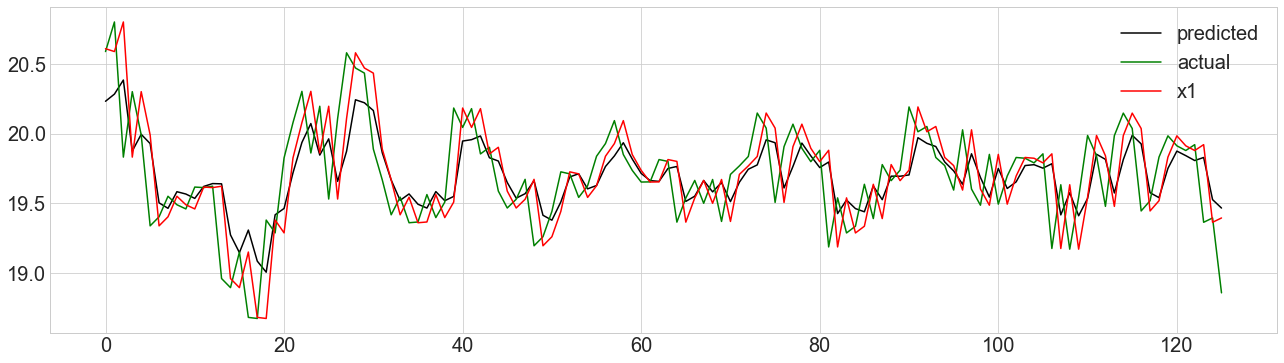

In [72]:

plt.plot(y_pred, linestyle='-', color="black", label='predicted')
plt.plot(actual, linestyle='-', color="green", label='actual')
plt.plot(x1_n, linestyle='-', color="red", label='x1')
# plt.plot(x2_n, linestyle='-', color="orange", label='x2')
# plt.plot(x3_n, linestyle='--', color="pink", label='x3')
plt.legend()
plt.show()

In [70]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [71]:
# fit model
model = ARIMA(actual, order=(3,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  126
Model:                     ARMA(3, 0)   Log Likelihood                 -21.881
Method:                       css-mle   S.D. of innovations              0.287
Date:                Wed, 28 Mar 2018   AIC                             53.762
Time:                        11:01:18   BIC                             67.944
Sample:                             0   HQIC                            59.524
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7040      0.072    272.430      0.000      19.562      19.846
ar.L1.y        0.5767      0.090      6.373      0.000       0.399       0.754
ar.L2.y        0.1265      0.107      1.183      0.2